In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import cm
import sympy as sym

In [2]:
class Element:
    
    def __init__(self, x1, x2, Id, NElements):
        
        print('Creating element:', Id)
        
        self.x1 = x1
        self.x2 = x2
        self.Id = Id
        self.Ne = NElements
        
        self.dim = 2
        
        self.x = sym.Symbol('x',type='Real')
        
        self.R = np.zeros((self.dim, self.Ne+1))
        self.GetR()
        
    def f1(self,x):
        return (x-self.x2)/(self.x1-self.x2)

    def f2(self,x):
        return (x-self.x1)/(self.x2-self.x1)
    
    def GetR(self):
        
        self.R[0,self.Id] = 1.
        self.R[1,self.Id+1] = 1.
    
    def GetLocalStiff(self):
        
        self.F = np.array([self.f1(self.x),self.f2(self.x)])
        self.GradF = np.zeros_like(self.F)
        
        for i in range(self.dim):
            self.GradF[i] = sym.diff(self.F[i],self.x)
            
        #print(self.GradF)
        
        self.S = np.zeros((self.dim,self.dim))
        
        for i in range(self.dim):
            for j in range(self.dim):
                func = self.GradF[i]*self.GradF[j]
                I = sym.integrate(func, (self.x,self.x1,self.x2))
                self.S[i,j] = I
                
        return self.S
    
    def GetLocalF(self,f):
        
        self.VectorF = np.zeros(self.dim)
        
        #inner product 
        for i in range(len(self.VectorF)):
            I = sym.integrate( self.F[i]*f(self.x), (self.x,self.x1,self.x2) )
            self.VectorF[i] = I
            
        return self.VectorF
    
    def GetGlobalStiff(self):
        
        S = self.GetLocalStiff()
        tmp = np.dot(S,self.R)
        self.GS = np.dot(self.R.T,tmp)
        
        return self.GS
    
    def GetGlobalF(self,f):
        
        F = self.GetLocalF(f)
        self.GF = np.dot(self.R.T,F)
        
        return self.GF

In [3]:
def Source(x):
    return 10.

In [4]:
NElements = 15
xmin = 0.
xmax = 10.
x = np.linspace(xmin,xmax,NElements+1)

In [5]:
Elements_ = []

for i in range(NElements):
    e = Element(x[i],x[i+1],i,NElements)
    Elements_.append(e)

Creating element: 0
Creating element: 1
Creating element: 2
Creating element: 3
Creating element: 4
Creating element: 5
Creating element: 6
Creating element: 7
Creating element: 8
Creating element: 9
Creating element: 10
Creating element: 11
Creating element: 12
Creating element: 13
Creating element: 14


In [6]:
Elements_[1].R

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [7]:
Elements_[1].GetGlobalStiff()

array([[ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  1.5, -1.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. , -1.5,  1.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
         0. ,  0. ,  0

In [8]:
def GetAssembled(NElements):
    
    AM = np.zeros((NElements+1,NElements+1))
    AF = np.zeros(NElements+1)
    
    for e in Elements_:
        GM = e.GetGlobalStiff()
        F = e.GetGlobalF(Source)
        AM += GM
        AF += F
        
    return AM,AF

In [9]:
AM,AF = GetAssembled(NElements)
print(AM)
print(AF)

[[ 1.5 -1.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [-1.5  3.  -1.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.  -1.5  3.  -1.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.  -1.5  3.  -1.5  0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.  -1.5  3.  -1.5  0.   0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.  -1.5  3.  -1.5  0.   0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.  -1.5  3.  -1.5  0.   0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -1.5  3.  -1.5  0.   0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -1.5  3.  -1.5  0.   0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.  -1.5  3.  -1.5  0.   0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.  -1.5  3.  -1.5  0.   0.
   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -1.5  3.  -1.5  0.
   0.

In [10]:
def GetSolution(T):
    
    AM,AF = GetAssembled(NElements)
    Ti = np.dot(AM,T)
    
    AF_ = AF - Ti
    
    # Quitamos fronteras
    AM1 = AM[1:-1,1:-1]
    AF1 = AF_[1:-1]
    
    Sol = np.linalg.solve(AM1,AF1)
    
    print(AM1)
    
    T[1:-1] = Sol
    
    dt0 =    AF[0]  - np.dot(AM,T)[0]
    dt1 =  - AF[-1] + np.dot(AM,T)[-1]
    
    return T,dt0,dt1

In [11]:
T = np.zeros(NElements+1)
T[0] = 20
T[-1] = 180
T1,dt0,dt1 = GetSolution(T)

[[ 3.  -1.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [-1.5  3.  -1.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.  -1.5  3.  -1.5  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.  -1.5  3.  -1.5  0.   0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -1.5  3.  -1.5  0.   0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -1.5  3.  -1.5  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -1.5  3.  -1.5  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -1.5  3.  -1.5  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -1.5  3.  -1.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.  -1.5  3.  -1.5  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.  -1.5  3.  -1.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -1.5  3.  -1.5  0. ]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  -1.5  3.  -1.5]
 [ 0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 

In [12]:
print(T1)

[ 20.          61.77777778  99.11111111 132.         160.44444444
 184.44444444 204.         219.11111111 229.77777778 236.
 237.77777778 235.11111111 228.         216.44444444 200.44444444
 180.        ]


In [13]:
t = np.linspace(x[0],x[-1],51)

In [14]:
def SymToNumpy(x1):
    x = sym.Symbol('x', real=True)  
    f = sym.lambdify([x], Source(x1),'numpy')
    return f(x1)

In [15]:
y = np.zeros_like(t)
for i in range(len(t)):
    y[i] =  -SymToNumpy(t[i])*t[i]**2/2. + dt0*t[i] + T[0]
   # y[i] = SymToNumpy(t[i]) + ( dt0 - 1)*t[i] + T[0] 
   # y[i] = -SymToNumpy(t[i]) + ( dt0 - 1)*t[i] + T[0] + 1 

In [16]:
# Escribimos la combinacion lineal de funciones de la función que interpola al elemento
def Solution(x, Elements_,T):
    
    y = -1
    
    for i in range(NElements):  
        if x >= Elements_[i].x1 and x < Elements_[i].x2:  
            y = Elements_[i].f1(x)*T[i]+Elements_[i].f2(x)*T[i+1]
        
    return y

In [17]:
l = np.linspace(0,9.99,50)
y1 = np.zeros_like(l)
for i in range(len(l)):
    y1[i] = Solution(l[i],Elements_,T1)

<IPython.core.display.Javascript object>


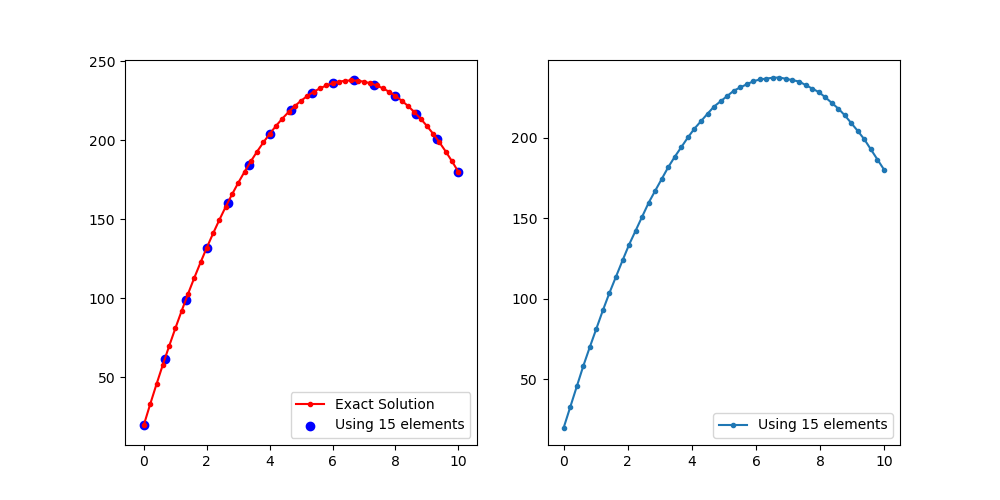

In [18]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)
ax.plot(t,y,color="r", marker='.', label='Exact Solution')
ax.scatter(x,T1,color="b", marker='o',label='Using %.0f elements' %(NElements))
ax1.plot(l,y1, marker='.',label='Using %.0f elements' %(NElements))
ax.legend()
ax1.legend()
plt.show()